In [5]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
fertilizer = pd.read_csv("Fertilizer Prediction.csv")
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
fertilizer.shape

(99, 9)

In [8]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [9]:
fertilizer.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [10]:
fertilizer.duplicated().sum()

0

In [11]:
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [12]:
ft = fertilizer.corr()
ft

C:\Users\raval\AppData\Local\Temp\ipykernel_20044\233580648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ft = fertilizer.corr()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<Axes: >

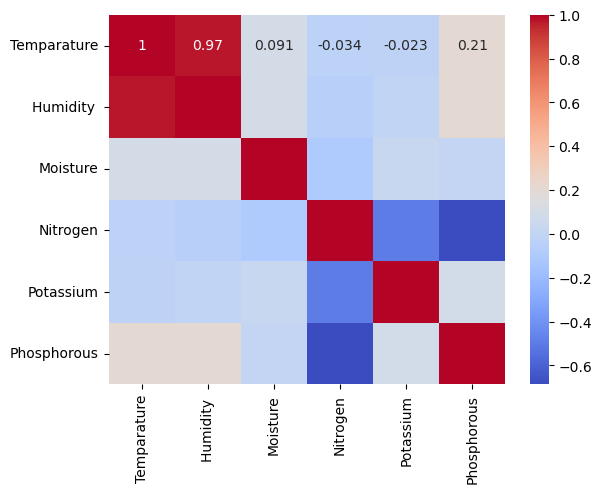

In [13]:
import seaborn as sea
sea.heatmap(ft,annot=True,cbar=True,cmap='coolwarm')

In [14]:
fertilizer['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [15]:
import matplotlib.pyplot as plt

C:\Users\raval\AppData\Local\Temp\ipykernel_20044\301136775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(fertilizer['Temparature'])


<Axes: xlabel='Temparature', ylabel='Density'>

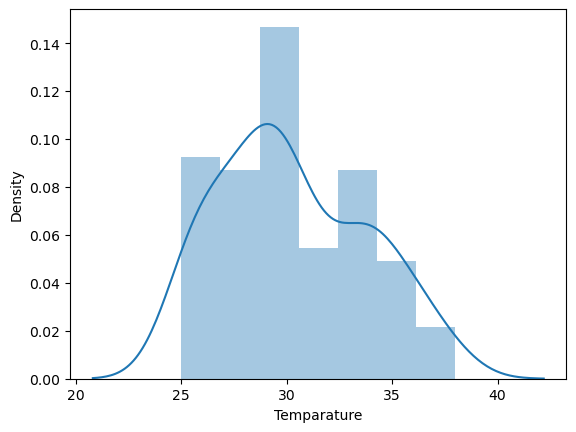

In [16]:
sea.distplot(fertilizer['Temparature'])


In [17]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [18]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [19]:
fertilizer['fert_no'].value_counts()

1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: fert_no, dtype: int64

In [20]:
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [22]:
fertilizer.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'fert_no'],
      dtype='object')

In [23]:
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])

In [24]:
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [25]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [26]:
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']

x.shape

(99, 8)

In [27]:
y.shape

(99,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [30]:
x_train.shape

(79, 8)

In [31]:
x_test.shape

(20, 8)

# Scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mx = MinMaxScaler()

mx.fit(x_train)

MinMaxScaler()

In [34]:
x_train = mx.transform(x_train)
x_test = mx.transform(x_test)

In [35]:
x_train

array([[0.61538462, 0.63636364, 0.65      , 1.        , 0.3       ,
        0.        , 0.47368421, 0.69047619],
       [0.07692308, 0.09090909, 0.35      , 0.25      , 0.7       ,
        0.44444444, 0.        , 0.54761905],
       [0.        , 0.        , 0.375     , 0.25      , 0.7       ,
        0.02777778, 1.        , 0.38095238],
       [0.46153846, 0.54545455, 0.6       , 0.        , 0.8       ,
        0.13888889, 0.68421053, 0.33333333],
       [0.30769231, 0.36363636, 0.225     , 1.        , 0.4       ,
        0.27777778, 0.        , 0.88095238],
       [0.84615385, 0.81818182, 0.325     , 1.        , 0.        ,
        0.05555556, 0.47368421, 0.71428571],
       [0.30769231, 0.36363636, 0.2       , 0.        , 0.5       ,
        0.11111111, 0.36842105, 0.71428571],
       [0.38461538, 0.45454545, 0.375     , 1.        , 0.4       ,
        1.        , 0.        , 0.        ],
       [0.46153846, 0.54545455, 0.575     , 1.        , 0.3       ,
        0.25      , 0.789473

# Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [37]:
x_train

array([[ 0.76462082,  0.80219471,  0.71373089,  1.45583886, -0.73178566,
        -1.15292671,  0.91259936,  0.80677787],
       [-1.22988538, -1.23117583, -0.39185226, -0.7141851 ,  0.56733945,
         0.24967133, -0.63230099,  0.3465941 ],
       [-1.51481484, -1.57007092, -0.29972033, -0.7141851 ,  0.56733945,
        -1.06526433,  2.62915531, -0.19028696],
       [ 0.19476191,  0.46329962,  0.52946704, -1.43752643,  0.89212073,
        -0.71461482,  1.59922174, -0.34368155],
       [-0.37509701, -0.21449056, -0.8525119 ,  1.45583886, -0.40700439,
        -0.27630294, -0.63230099,  1.42035622],
       [ 1.6194092 ,  1.47998489, -0.48398419,  1.45583886, -1.7061295 ,
        -0.97760196,  0.91259936,  0.88347516],
       [-0.37509701, -0.21449056, -0.94464383, -1.43752643, -0.08222311,
        -0.8022772 ,  0.56928817,  0.88347516],
       [-0.09016755,  0.12440453, -0.29972033,  1.45583886, -0.40700439,
         2.00291888, -0.63230099, -1.41744366],
       [ 0.19476191,  0.46329962

# Training Models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [39]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


In [40]:
for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9
Naive Bayes  with accuracy : 1.0
Support Vector Machine  with accuracy : 0.8
K-Nearest Neighbors  with accuracy : 0.6
Decision Tree  with accuracy : 1.0
Random Forest  with accuracy : 1.0
Bagging  with accuracy : 1.0
AdaBoost  with accuracy : 0.7
Gradient Boosting  with accuracy : 0.95
Extra Trees  with accuracy : 0.75


In [41]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred = rfc.predict(x_test)
accuracy_score(y_test,ypred)

1.0

In [44]:
def recommendation(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = mx.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [46]:


# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
    
    # Use the recommendation function to get a prediction
prediction = recommendation(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

    # Define fertilizer dictionary
fert_dict = {
        1: 'Urea',
        2: 'DAP',
        3: '14-35-14',
        4: '28-28',
        5: '17-17-17',
        6: '20-20',
        7: '10-26-26'
    }

    # Check if prediction is in the fertilizer dictionary
if prediction[0] in fert_dict:
    recommended_fert = fert_dict[prediction[0]]
    print("{} is the recommended fertilizer to be used.".format(recommended_fert))
else:
    print("Sorry, we are not able to recommend a proper fertilizer for this environment.")


28-28 is the recommended fertilizer to be used.


In [47]:
import pickle
pickle.dump(rfc,open('fert.sav','wb'))

In [48]:
pickle.dump(mx,open('fminmaxscaler.sav','wb'))
pickle.dump(sc,open('fstandscaler.sav','wb'))